# Pytorch tutorial

inspired from [here](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)

#### pros:
- Iinteractively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
- Clean support for dynamic graphs
- Organizational backing from Facebook
- Blend of high level and low level APIs

#### cons:
- Much less mature than alternatives
- Limited references / resources outside of the official documentation


**Notes**:-

- In pytorch, matrix(array) is called tensors.

### creating matrix

In [1]:
# in Numpy
import numpy as np

array = [[1,2,3],[4,5,6]] #2x3 array
first_array = np.array(array)
print(type(first_array))
(np.shape(first_array))

<class 'numpy.ndarray'>


(2, 3)

In [2]:
# in pytorch
import torch

tensor = torch.Tensor(array)
print(tensor.type)
print(tensor.shape)

<built-in method type of Tensor object at 0x7fa12b5fd3f0>
torch.Size([2, 3])


### Singular matrix

In order to learn, compare numpy and tensor
- **np.ones() = torch.ones()**
- **np.random.rand() = torch.rand()**


In [3]:
print(np.ones((2,3)))
print("-------------------------")
print(torch.ones((2,3)))

[[1. 1. 1.]
 [1. 1. 1.]]
-------------------------
tensor([[1., 1., 1.],
        [1., 1., 1.]])


### Generate random values

In [4]:
print(np.random.rand(2,3))
print("-------------------------")
print(torch.rand(2,3))

[[0.79678991 0.67652206 0.62878686]
 [0.6780337  0.36890485 0.06713148]]
-------------------------
tensor([[0.0176, 0.5942, 0.8364],
        [0.5757, 0.4061, 0.0221]])


### Basic math with pytorch

- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [5]:
#creating tensor
tensor = torch.ones((3,3))
print(torch.ones((3,3)))
print("*"*20)
print('after resize')
print(tensor.view(9))
print("*"*20)
print('Addition')
print(torch.add(tensor,tensor))
print("*"*20)
print("Subtraction")
print(tensor.sub(tensor))
print("*"*20)
print('Element wise Multiplication')
print(torch.mul(tensor,tensor))
print("*"*20)
print('Element wise Division')
print(torch.div(tensor,tensor))
print("*"*20)
print("Mean")
tensor = torch.Tensor([1,2,3,4,5])
print(tensor.mean())
print("*"*20)
print("Standard Deviation")
print(tensor.std())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
********************
after resize
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
********************
Addition
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
********************
Subtraction
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
********************
Element wise Multiplication
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
********************
Element wise Division
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
********************
Mean
tensor(3.)
********************
Standard Deviation
tensor(1.5811)


### Variable

- The Variable, just like a Tensor is a class that is used to hold data.
- Variables are specifically tailored to hold values which change during training of a neural network, i.e. the learnable paramaters of our network.
- Tensors on the other hand are used to store values that are not to be learned.

In [6]:
from torch.autograd import Variable

var_ex = Variable(torch.randn((4,3))) #creating variable.

### Back propogation

- **backward()** # calculates gradients
- **x.grad()** # lets you see gradients
- **requires_grad**. This is an attribute of the Variable class. By default, it's False. It comes handy when you have to freeze some layers, and stop them from updating parameters while training.

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
Lets implement

In [7]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


### ANN

- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer.
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because I will not explain neural network detailed here, only explain pytorch.
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.

#### Steps

1. Import Libraries
    - In order to show you, I import again but we actually imported them at previous parts.
2. Prepare Dataset
    - Totally same with previous part(logistic regression).
    - We use same dataset so we only need train_loader and test_loader.
    - We use same batch size, epoch and iteration numbers.
3. Create ANN Model
    - We add 3 hidden layers.
    - We use ReLU, Tanh and ELU activation functions for diversity.
4. Instantiate Model Class
    - input_dim = 2828 # size of image pxpx
    - output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9
    - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
    - create model
5. Instantiate Loss Class
    - Cross entropy loss
    - It also has softmax(logistic function) in it.
6. Instantiate Optimizer Class
    - SGD Optimizer
7. Traning the Model
8. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training).
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [8]:
# Import Libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

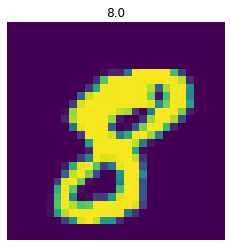

In [15]:
train = pd.read_csv('/home/purna/PURNA/BLINDNESS/digit-recognizer/train.csv',dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization


# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long


# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)


# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [16]:
# Create ANN Model

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [21]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, [loss.data], accuracy))


Iteration: 500  Loss: [tensor(0.4180)]  Accuracy: 87 %
Iteration: 1000  Loss: [tensor(0.3322)]  Accuracy: 89 %
Iteration: 1500  Loss: [tensor(0.1983)]  Accuracy: 90 %
Iteration: 2000  Loss: [tensor(0.2529)]  Accuracy: 91 %
Iteration: 2500  Loss: [tensor(0.2869)]  Accuracy: 92 %
Iteration: 3000  Loss: [tensor(0.1055)]  Accuracy: 93 %
Iteration: 3500  Loss: [tensor(0.1936)]  Accuracy: 94 %
Iteration: 4000  Loss: [tensor(0.0523)]  Accuracy: 94 %
Iteration: 4500  Loss: [tensor(0.2770)]  Accuracy: 94 %
Iteration: 5000  Loss: [tensor(0.0985)]  Accuracy: 95 %
Iteration: 5500  Loss: [tensor(0.1917)]  Accuracy: 95 %
Iteration: 6000  Loss: [tensor(0.1658)]  Accuracy: 95 %
Iteration: 6500  Loss: [tensor(0.0862)]  Accuracy: 95 %
Iteration: 7000  Loss: [tensor(0.1108)]  Accuracy: 96 %
Iteration: 7500  Loss: [tensor(0.1153)]  Accuracy: 96 %
Iteration: 8000  Loss: [tensor(0.1852)]  Accuracy: 96 %
Iteration: 8500  Loss: [tensor(0.0559)]  Accuracy: 96 %
Iteration: 9000  Loss: [tensor(0.0535)]  Accuracy

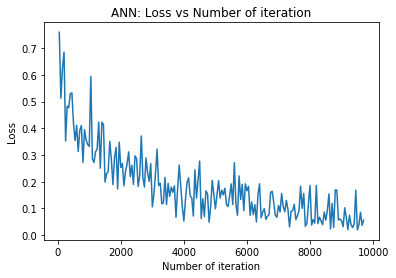

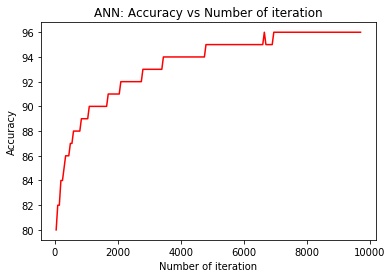

In [22]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### Convolutional Neural Network (CNN)

- CNN is well adapted to classify images.
- You can learn CNN basics and concepts from Pourya's tutorial: https://www.kaggle.com/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
#### Steps of CNN:
1. Import Libraries
2. Prepare Dataset
    - Totally same with previous parts.
    - We use same dataset so we only need train_loader and test_loader.
3. Convolutional layer:
- Create feature maps with filters(kernels).
- Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
- We use 2 convolutional layer.
- Number of feature map is out_channels = 16
- Filter(kernel) size is 5*5
4. Pooling layer:
- Prepares a condensed feature map from output of convolutional layer(feature map)
- 2 pooling layer that we will use max pooling.
- Pooling size is 2*2
5. Flattening: Flats the features map
6. Fully Connected Layer:
    - Artificial Neural Network that we learnt at previous part.
    - Or it can be only linear like logistic regression but at the end there is always softmax function.
    - We will not use activation function in fully connected layer.
    - You can think that our fully connected layer is logistic regression.
    - We combine convolutional part and logistic regression to create our CNN model.
7. Instantiate Model Class
    - create model
8. Instantiate Loss Class
    - Cross entropy loss
    - It also has softmax(logistic function) in it.
9. Instantiate Optimizer Class
    - SGD Optimizer
10. Traning the Model
11. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training).
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.

In [23]:
# Import Libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [24]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create ANN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, [loss.data], accuracy))

Iteration: 500  Loss: [tensor(0.1218)]  Accuracy: 96 %
Iteration: 1000  Loss: [tensor(0.0381)]  Accuracy: 97 %
Iteration: 1500  Loss: [tensor(0.0346)]  Accuracy: 97 %
Iteration: 2000  Loss: [tensor(0.0183)]  Accuracy: 98 %


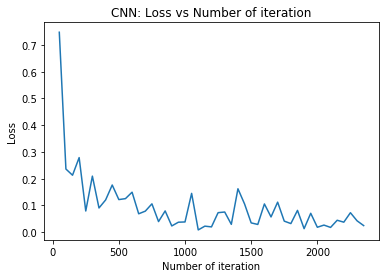

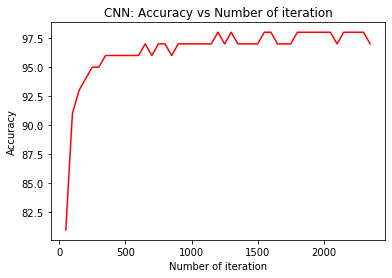

In [26]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### RNN

- RNN is essentially repeating ANN but information get pass through from previous non-linear activation function output.
#### Steps of RNN:
1. Import Libraries
2. Prepare Dataset
3. Create RNN Model
    - hidden layer dimension is 100
    - number of hidden layer is 1
4. Instantiate Model Class
5. Instantiate Loss Class
    - Cross entropy loss
    - It also has softmax(logistic function) in it.
6. Instantiate Optimizer Class
    - SGD Optimizer
7. Traning the Model
8.Prediction


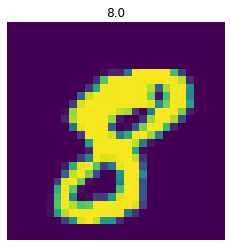

In [33]:
# Prepare Dataset
# load data
train = pd.read_csv('/home/purna/PURNA/BLINDNESS/digit-recognizer/train.csv',dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()


In [34]:
# Create RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, 
                          nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, [loss.data], accuracy))

Iteration: 500  Loss: [tensor(1.7889)]  Accuracy: 30 %
Iteration: 1000  Loss: [tensor(0.6410)]  Accuracy: 72 %
Iteration: 1500  Loss: [tensor(1.3625)]  Accuracy: 54 %
Iteration: 2000  Loss: [tensor(0.6612)]  Accuracy: 83 %


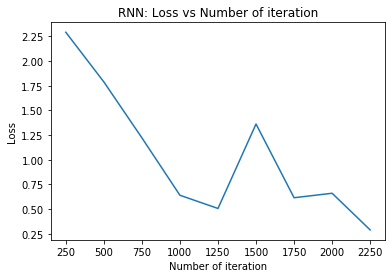

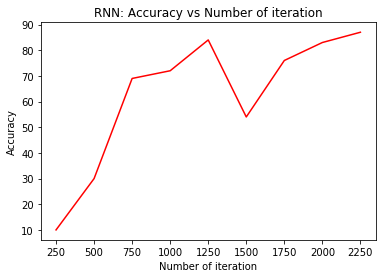

In [36]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()
